In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import re

In [19]:
df=pd.read_csv('UScomments.csv',on_bad_lines="skip")
df.head()


C:\Users\vicky kumar\AppData\Local\Temp\ipykernel_22248\2684919692.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('UScomments.csv',on_bad_lines="skip")


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [20]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [24]:
TextBlob("It's so funny").sentiment.polarity

0.25

In [25]:
df.shape

(691374, 4)

In [26]:
sample_df=df[0:1000]

In [27]:
sample_df.shape

(1000, 4)

In [28]:
polarity =[]

for i in df['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
    

In [29]:
len(polarity)

691374

In [30]:
df["polarity"]=polarity

In [31]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [33]:
filetr1=df["polarity"]==1

In [38]:
comments_positive = df[filetr1]

In [36]:
filter2=df["polarity"]==-1

In [39]:
comments_negative=df[filter2]

In [40]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [42]:
from wordcloud import WordCloud,STOPWORDS

In [43]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [44]:
df["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [45]:
type(df["comment_text"])

pandas.core.series.Series

In [46]:
total_comments_positive=" ".join(comments_positive["comment_text"])

In [50]:
# Wordcloud Accepts only String Dataset .So we need to convert the Series dataset into String

wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

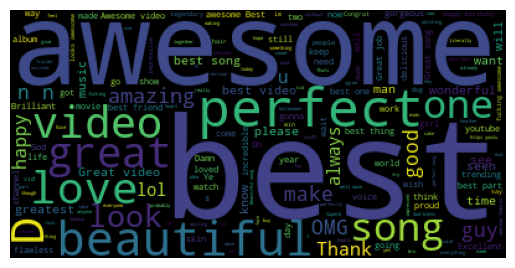

In [ ]:
plt.imshow(wordcloud)
plt.axis("off")

In [52]:
total_comments_negative=" ".join(comments_negative["comment_text"])

In [55]:
negative_wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

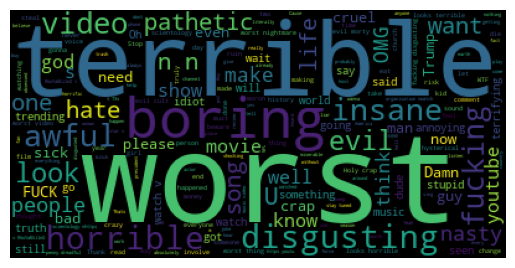

In [56]:
plt.imshow(negative_wordcloud)
plt.axis("off")

In [57]:
import emoji
print(emoji.__version__)

2.14.1


In [58]:
df['comment_text'].head(8)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
6                                 The end though 😭👍🏻❤️
7                                 #1 trending!!!!!!!!!
Name: comment_text, dtype: object

In [60]:
comment='trending 😉'

[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [62]:
all_emoji_list=[]

for comment in df['comment_text']:
    emoji_list=[char for char in comment if char in emoji.EMOJI_DATA]
    all_emoji_list.extend(emoji_list)

In [63]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [64]:
from collections import Counter

In [65]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [66]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [ ]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [68]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [69]:
emojis=[Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]

In [83]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [84]:
frequency=[Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]

In [85]:
frequency

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [86]:
import plotly.graph_objects as go
from plotly.offline import iplot


In [78]:
trace=go.Bar(x=emojis,y=frequency)

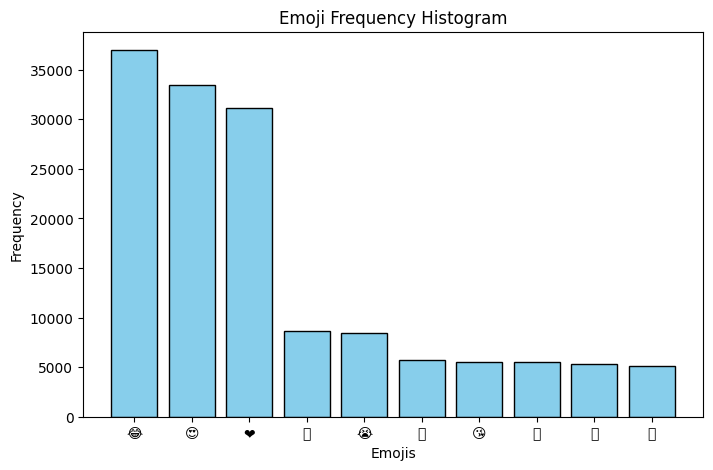

In [88]:
x=emojis
y=frequency

plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel("Emojis")
plt.ylabel("Frequency")
plt.title("Emoji Frequency Histogram")

# Show plot
plt.show()


In [12]:
df['video_id'].value_counts()

video_id
XpVt6Z1Gjjo    800
sjlHnJvXdQs    800
WYYvHb03Eog    800
4X6a3G_0HjY    800
CYoRmfI0LUc    800
              ... 
mShBE_wHAk8      1
HjfN2Phsfng      1
c5RsAXsZvI8      1
94U8bow4CU4      1
mi52IqpOp54      1
Name: count, Length: 2266, dtype: int64

In [13]:
df.describe()

,video_id,comment_text,likes,replies
count,691400,691374,691400,691400
unique,2266,434075,1284,479
top,XpVt6Z1Gjjo,Lol,0,0
freq,800,310,456894,525730


In [89]:
import os

In [98]:
files=os.listdir(r"A:\Abhinandan\Youtube_project_shan_singh_Udemy\additional_data")

In [ ]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [106]:
file_csv=[file for file in files if file.endswith('.csv')]


In [107]:
file_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [108]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [110]:
full_df=pd.DataFrame()
path=r"A:\Abhinandan\Youtube_project_shan_singh_Udemy\additional_data"


for file in file_csv:
    # df=pd.read_csv(path+"/"+file, encoding='iso-8850-1', error_bad_lines=False) iso is update
    df = pd.read_csv(path + "/" + file, encoding="iso-8859-1", on_bad_lines="skip")

    full_df=pd.concat([full_df,df],ignore_index=True)

In [111]:
full_df.shape

(375942, 16)

In [112]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [113]:
full_df1=full_df.drop_duplicates()

In [114]:
full_df1.shape

(339525, 16)

In [ ]:
full_df1[0:1000].to_json(r"A:\Abhinandan\Youtube_project_shan_singh_Udemy\additional_data\sample.json")

In [ ]:
from sqlalchemy import create_engine

engine=create_engine('sqlite:///A:\Abhinandan.sqlite')

In [ ]:
full_df1[0:1000].to_sql("Users",con=engine,if_exists='append')